<a href="https://colab.research.google.com/github/heispv/programming-feb2023/blob/master/45_make_it_more_3D_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it more 3D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -O names.txt https://raw.githubusercontent.com/heispv/programming-feb2023/master/names.txt

--2024-05-27 16:52:08--  https://raw.githubusercontent.com/heispv/programming-feb2023/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2024-05-27 16:52:09 (9.74 MB/s) - ‘names.txt’ saved [228145/228145]



## Data Preprocessing

In [3]:
# Read the file
with open("names.txt", "r") as f:
    names = f.read().splitlines()

In [4]:
# Check the data
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
# Check the longest and shortes string in the dataset
print(f'Longest string in names: {max([len(name) for name in names])}')
print(f'Shortest string in names: {min([len(name) for name in names])}')

Longest string in names: 15
Shortest string in names: 2


In [6]:
set(''.join(names))

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [7]:
['.', '.'] + list('hello') + ['.']

['.', '.', 'h', 'e', 'l', 'l', 'o', '.']

In [8]:
b = dict()

for name in names:
    characters = ['.', '.'] + list(name) + ['.']
    for ch1, ch2, ch3 in zip(characters, characters[1:], characters[2:]):
        b[(ch1, ch2, ch3)] = b.get((ch1, ch2, ch3), 0) + 1

In [9]:
b

{('.', '.', 'e'): 1531,
 ('.', 'e', 'm'): 288,
 ('e', 'm', 'm'): 100,
 ('m', 'm', 'a'): 72,
 ('m', 'a', '.'): 174,
 ('.', '.', 'o'): 394,
 ('.', 'o', 'l'): 104,
 ('o', 'l', 'i'): 69,
 ('l', 'i', 'v'): 54,
 ('i', 'v', 'i'): 78,
 ('v', 'i', 'a'): 147,
 ('i', 'a', '.'): 903,
 ('.', '.', 'a'): 4410,
 ('.', 'a', 'v'): 243,
 ('a', 'v', 'a'): 161,
 ('v', 'a', '.'): 93,
 ('.', '.', 'i'): 591,
 ('.', 'i', 's'): 124,
 ('i', 's', 'a'): 142,
 ('s', 'a', 'b'): 76,
 ('a', 'b', 'e'): 173,
 ('b', 'e', 'l'): 201,
 ('e', 'l', 'l'): 822,
 ('l', 'l', 'a'): 337,
 ('l', 'a', '.'): 684,
 ('.', '.', 's'): 2055,
 ('.', 's', 'o'): 152,
 ('s', 'o', 'p'): 21,
 ('o', 'p', 'h'): 37,
 ('p', 'h', 'i'): 61,
 ('h', 'i', 'a'): 81,
 ('.', '.', 'c'): 1542,
 ('.', 'c', 'h'): 352,
 ('c', 'h', 'a'): 236,
 ('h', 'a', 'r'): 329,
 ('a', 'r', 'l'): 287,
 ('r', 'l', 'o'): 44,
 ('l', 'o', 't'): 14,
 ('o', 't', 't'): 34,
 ('t', 't', 'e'): 121,
 ('t', 'e', '.'): 175,
 ('.', '.', 'm'): 2538,
 ('.', 'm', 'i'): 393,
 ('m', 'i', 'a'): 9

In [10]:
chars = sorted(list(set(''.join(names))))

In [11]:
num_chars = len(chars) + 1
num_chars

27

In [12]:
# Create lookup table
s_to_i = {k: v+1 for v, k in enumerate(chars)}

In [13]:
s_to_i['.'] = 0

In [14]:
s_to_i

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [15]:
i_to_s = {k: v for v, k in s_to_i.items()}

In [16]:
i_to_s

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [17]:
my_matrix = np.zeros((num_chars, num_chars, num_chars))
my_matrix.shape

(27, 27, 27)

In [18]:
len(b)

6063

In [19]:
27 * 27 * 27

19683

In [20]:
for k, v in b.items():
    ch1, ch2, ch3 = k
    idx1 = s_to_i[ch1]
    idx2 = s_to_i[ch2]
    idx3 = s_to_i[ch3]

    my_matrix[idx1][idx2][idx3] = v

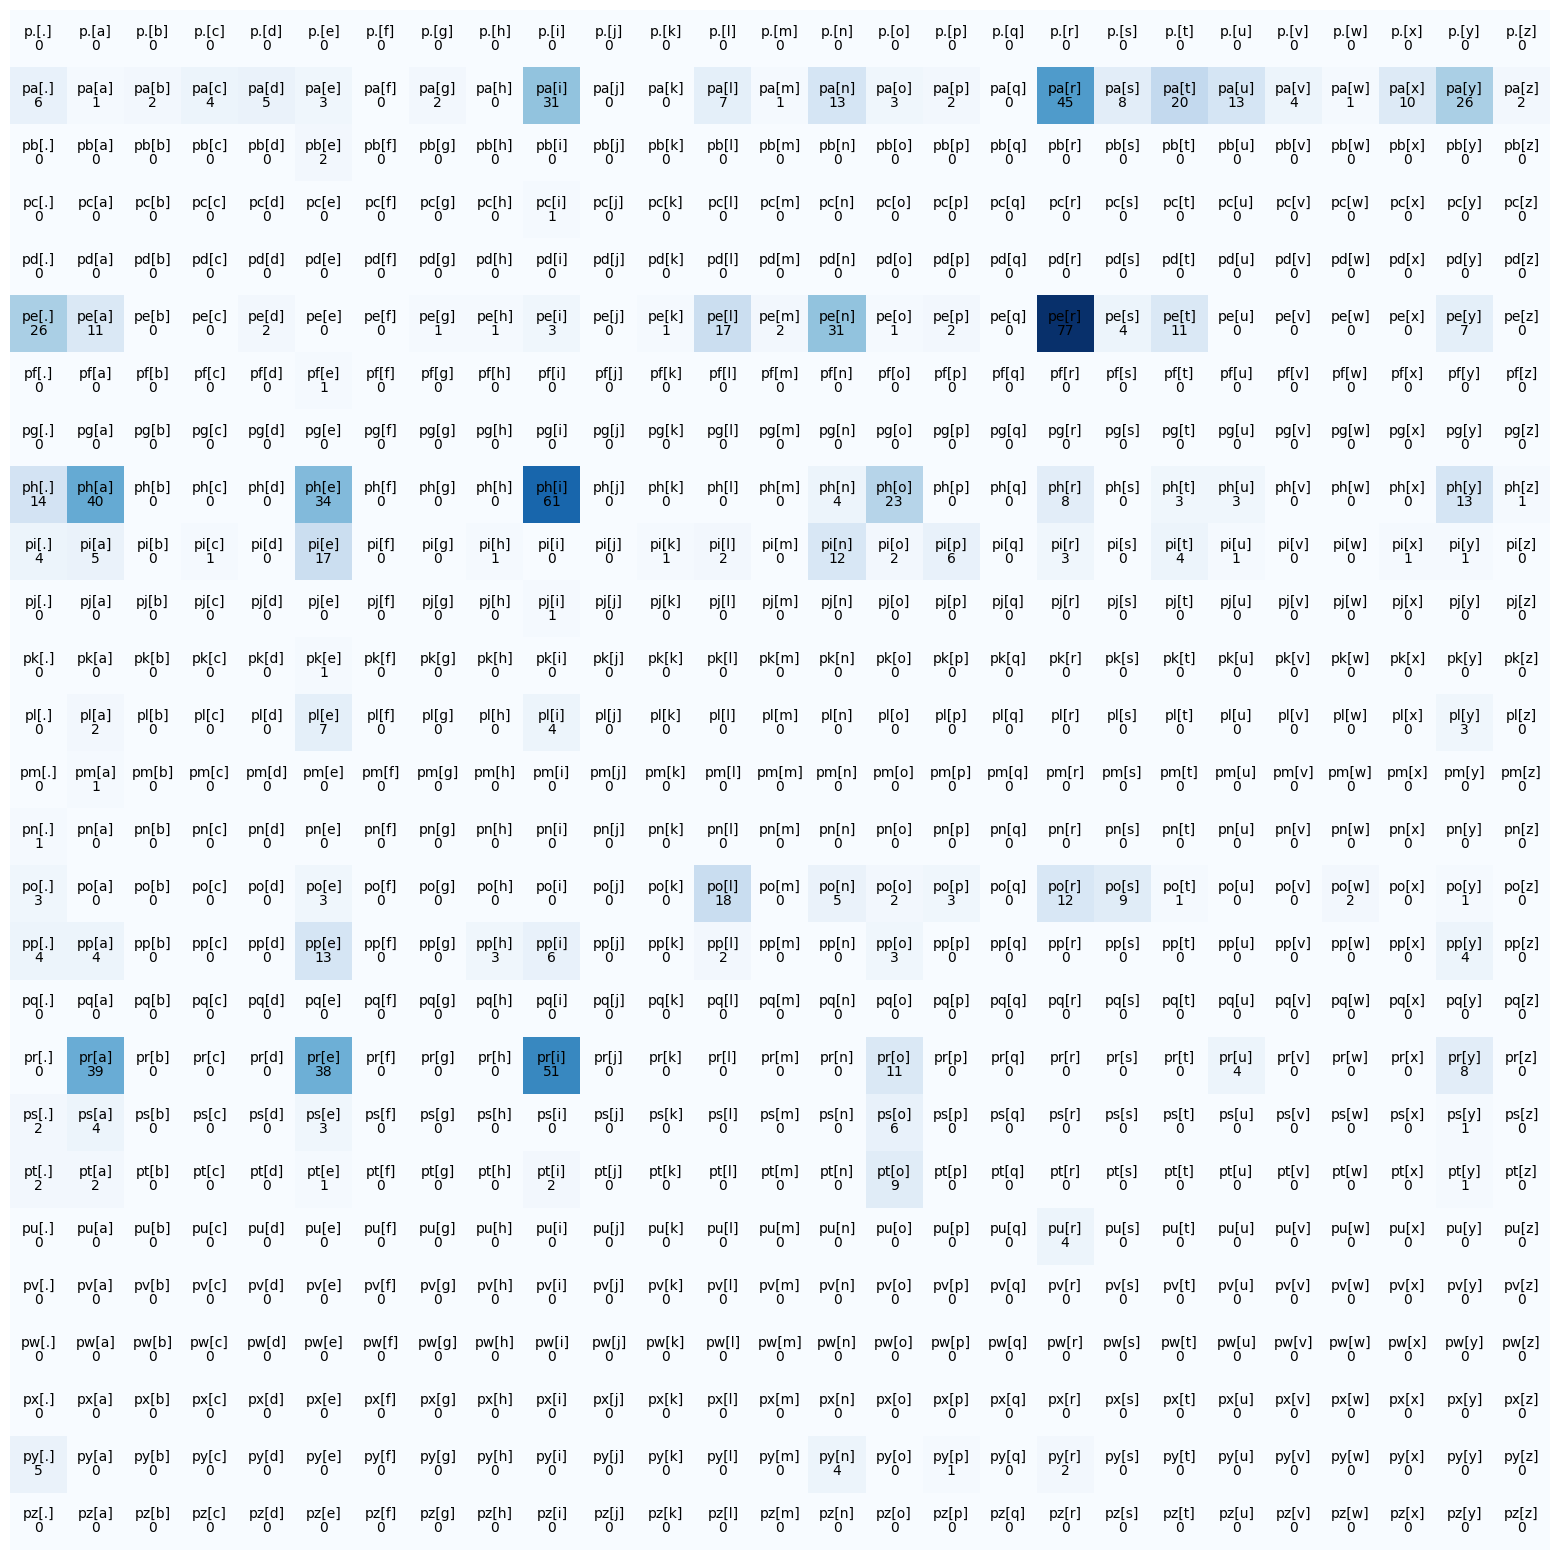

In [40]:
ch = 'p'
n = s_to_i[ch]

plt.figure(figsize=(20, 20))
plt.imshow(my_matrix[n], cmap="Blues")

for i in range(27):
    for j in range(27):
        ch_str = ch + i_to_s[i] + '[' + i_to_s[j] + ']'
        plt.text(j, i, ch_str, ha="center", va="bottom", color="k")
        plt.text(j, i, int(my_matrix[n, i, j].item()), ha="center", va="top", color="k")

plt.axis("off")
plt.show()

In [42]:
toy_example = np.array([[[1, 1, 1, 1],
                         [1, 1, 1, 1]],
                          [[2, 2, 2, 2],
                           [2, 2, 2, 2]],
                            [[3, 3, 3, 3],
                             [3, 3, 3, 3]]])
toy_example

array([[[1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[2, 2, 2, 2],
        [2, 2, 2, 2]],

       [[3, 3, 3, 3],
        [3, 3, 3, 3]]])

```py
 [[[4],
  [4]],
   [[8],
    [8]],
     [[12],
      [12]]]
```

In [43]:
print(toy_example.shape)

(3, 2, 4)


In [52]:
toy_majmoo = toy_example.sum(axis=2)
toy_majmoo

array([[ 4,  4],
       [ 8,  8],
       [12, 12]])

In [53]:
toy_majmoo.shape

(3, 2)

In [55]:
np.expand_dims(toy_majmoo, -1)

array([[[ 4],
        [ 4]],

       [[ 8],
        [ 8]],

       [[12],
        [12]]])

In [56]:
np.expand_dims(toy_majmoo, -1).shape

(3, 2, 1)

In [58]:
toy_example / np.expand_dims(toy_majmoo, -1)

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [59]:
majmoo = my_matrix.sum(axis=2) #satr ha ro baham jam mikone
print(majmoo.shape)
# agar bekhaim sotoon haro baham jam konim bayad az axis=1 estefade konim

(27, 27)


In [60]:
majmoo_correct_shape = np.expand_dims(majmoo, -1)
print(majmoo_correct_shape.shape)

(27, 27, 1)


In [67]:
final_matrix = my_matrix / (majmoo_correct_shape + 0.000001)
print(final_matrix.shape)

(27, 27, 27)


In [70]:
format(1/6)

SyntaxError: invalid decimal literal (<ipython-input-70-119556a6a1d0>, line 1)

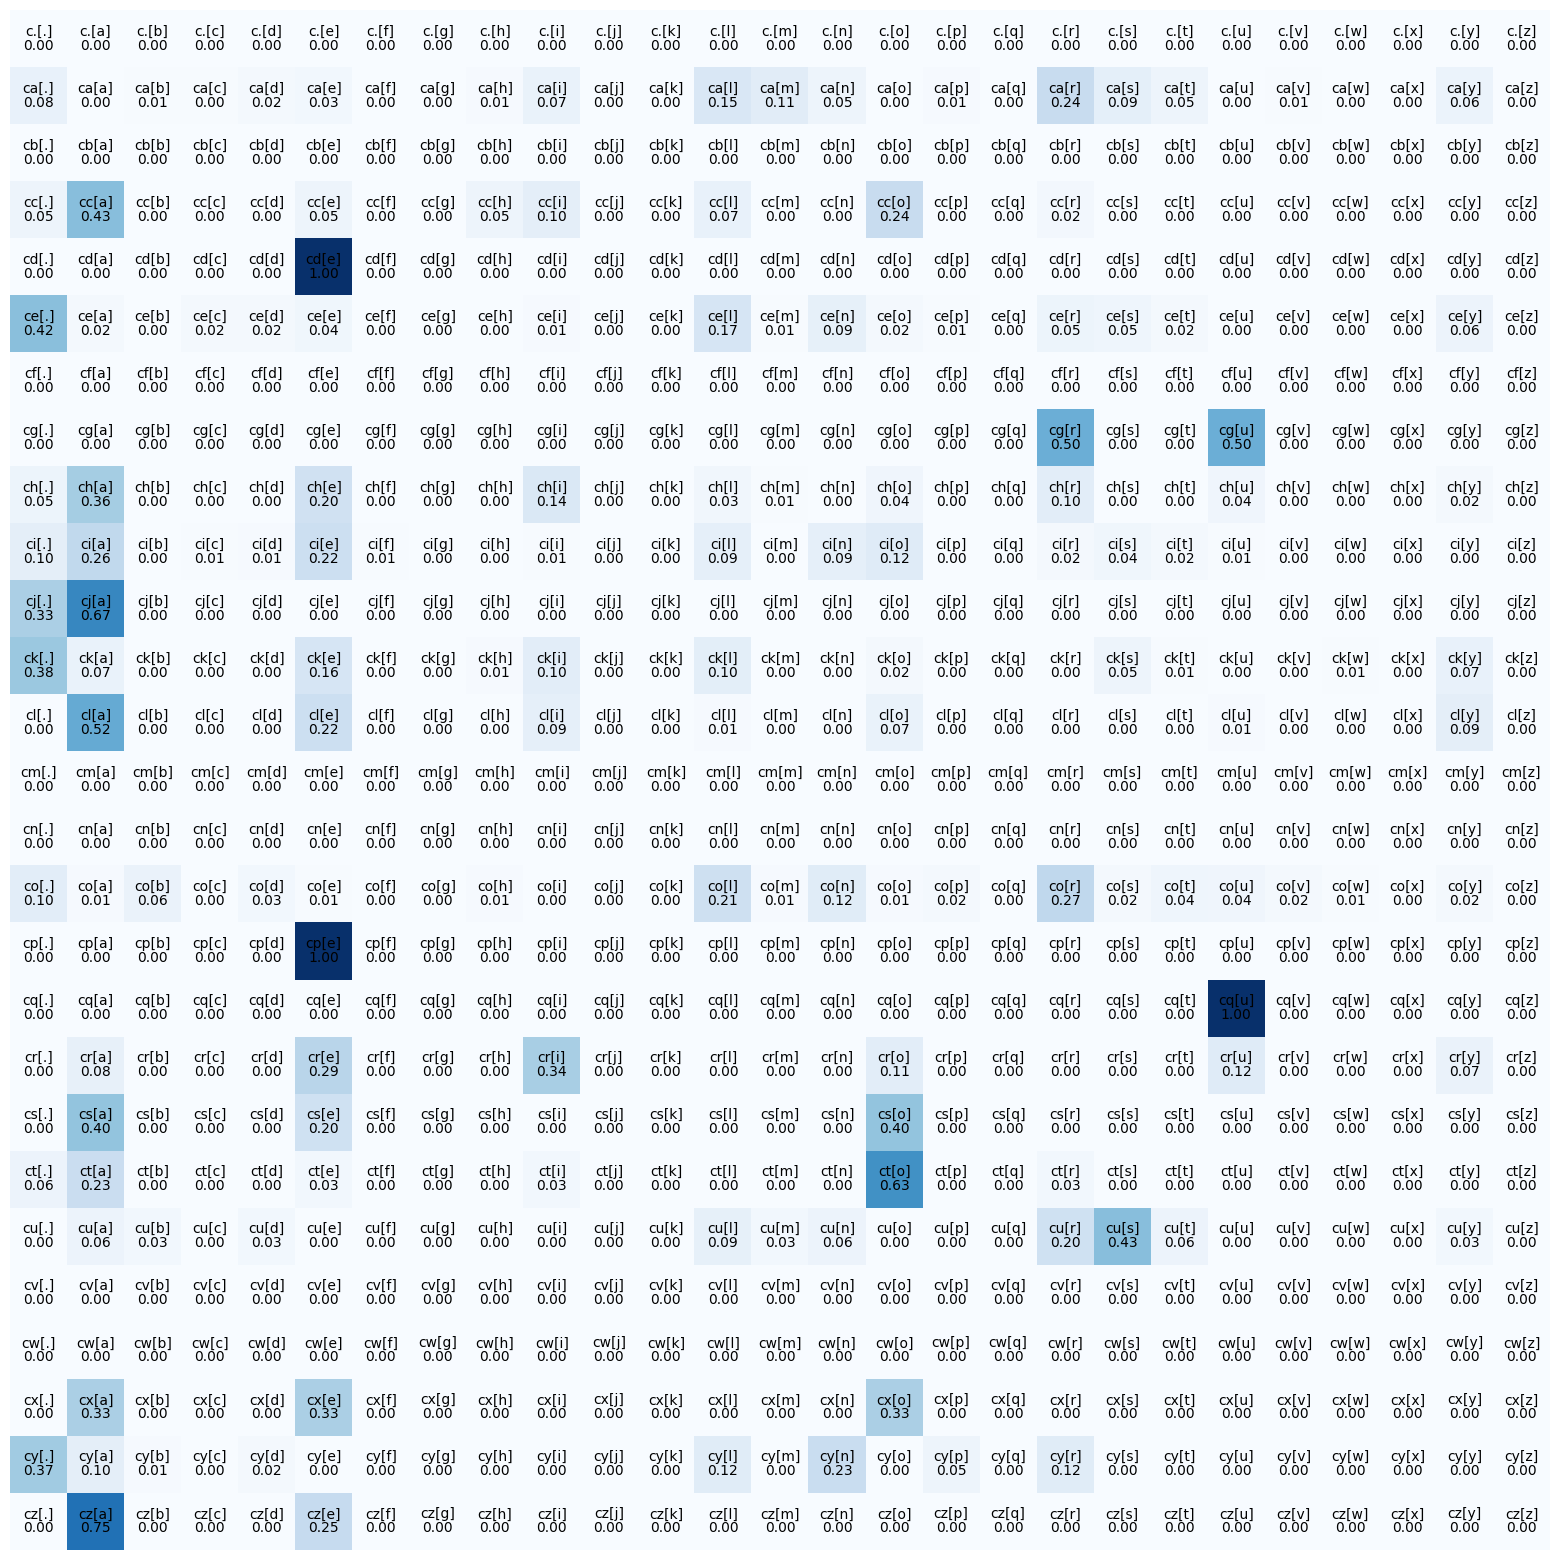

In [78]:
ch = 'c'
n = s_to_i[ch]

plt.figure(figsize=(20, 20))
plt.imshow(final_matrix[n], cmap="Blues")

for i in range(27):
    for j in range(27):
        ch_str = ch + i_to_s[i] + '[' + i_to_s[j] + ']'
        plt.text(j, i, ch_str, ha="center", va="bottom", color="k")
        plt.text(j, i, f"{float(final_matrix[n, i, j].item()):.2f}", ha="center", va="top", color="k")

plt.axis("off")
plt.show()

In [75]:
p1 = final_matrix[s_to_i['.']][s_to_i['.']]
p1

array([0.        , 0.13767053, 0.04077046, 0.04813786, 0.05275809,
       0.04779446, 0.01301783, 0.02088471, 0.02728436, 0.01844972,
       0.07560953, 0.09249836, 0.04907439, 0.07923079, 0.03577561,
       0.01229982, 0.01607717, 0.00287204, 0.05116599, 0.06415259,
       0.04083289, 0.00243499, 0.0117379 , 0.00958387, 0.00418319,
       0.01670153, 0.02900134])

In [77]:
idx1 = np.random.choice(list(range(len(p1))), p=p1)
i_to_s[idx1]

'y'

In [91]:
ch1 = 'c'
ch2 = 'c'

idx1 = s_to_i[ch1]
idx2 = s_to_i[ch2]

prob = final_matrix[idx1][idx2]
print(prob.sum())
print(prob)
print('-'*70)
prob = prob / prob.sum()
print(prob)
print(prob.sum())
idx3 = np.random.choice(list(range(len(prob))), p=prob)

ch3 = i_to_s[idx3]
ch3

0.9999999761904768
[0.04761905 0.42857142 0.         0.         0.         0.04761905
 0.         0.         0.04761905 0.09523809 0.         0.
 0.07142857 0.         0.         0.23809523 0.         0.
 0.02380952 0.         0.         0.         0.         0.
 0.         0.         0.        ]
----------------------------------------------------------------------
[0.04761905 0.42857143 0.         0.         0.         0.04761905
 0.         0.         0.04761905 0.0952381  0.         0.
 0.07142857 0.         0.         0.23809524 0.         0.
 0.02380952 0.         0.         0.         0.         0.
 0.         0.         0.        ]
1.0


'i'

In [100]:
def get_ch3(ch1, ch2):
    idx1 = s_to_i[ch1]
    idx2 = s_to_i[ch2]

    prob = final_matrix[idx1][idx2]
    prob = prob / prob.sum()

    idx3 = np.random.choice(list(range(len(prob))), p=prob)

    ch3 = i_to_s[idx3]
    return ch3

In [121]:
def get_random_name():
    complete_word = ['.', '.']
    while True:
        ch1 = complete_word[-2]
        ch2 = complete_word[-1]

        ch3 = get_ch3(ch1, ch2)
        complete_word.append(ch3)

        if ch3 == '.':
            break

    return ''.join(complete_word)

In [124]:
for _ in range(20):
    print(get_random_name())

..magh.
..an.
..milyn.
..ber.
..iyaley.
..la.
..heovevie.
..tielylee.
..karleilyn.
..kee.
..idylani.
..lazyis.
..ley.
..cailli.
..kaissannegani.
..dya.
..yonna.
..emraton.
..nolusira.
..sanna.
